Творческая работа по программированию за 3 триместр Гулякиной Лизы![screenshot_from_2019-02-22_20-03-39.png](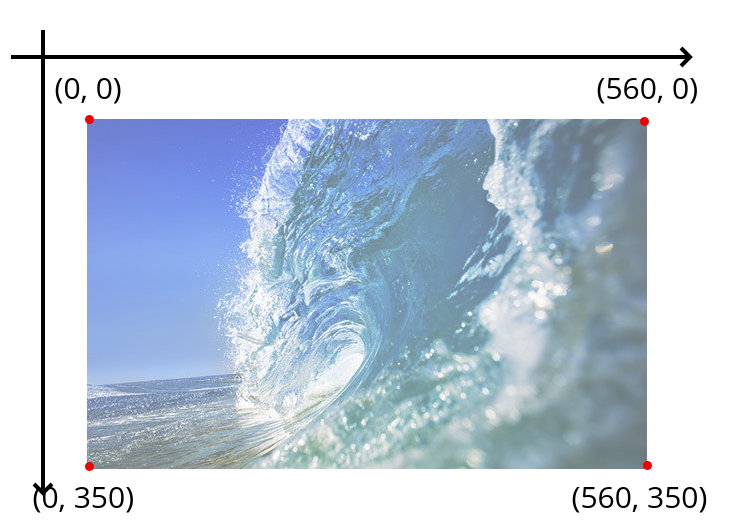![screenshot_from_2019-02-22_20-03-45.png](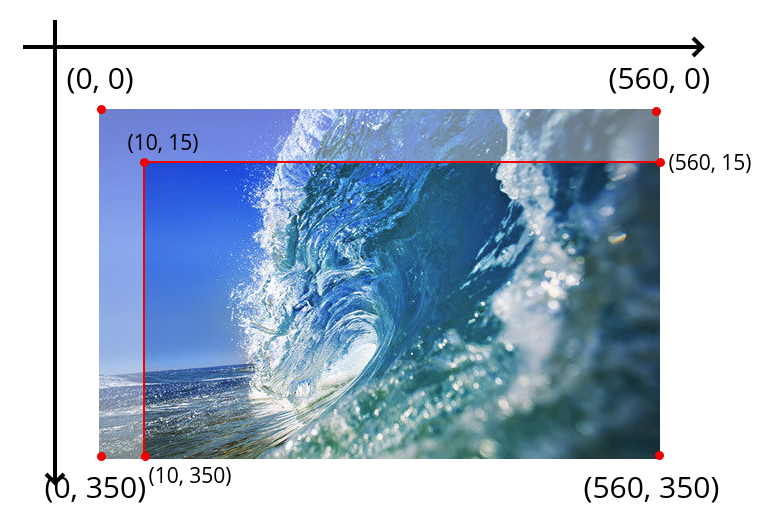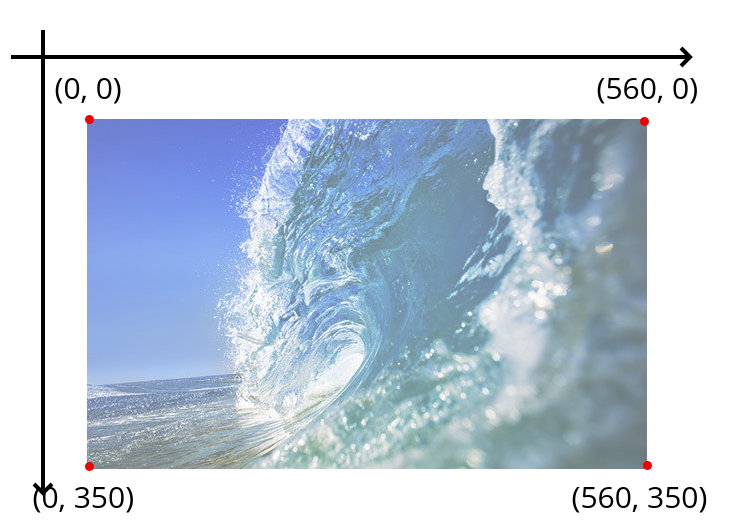))

# **Библиотека для работы с изображениями Pillow**

**Pillow (PIL)** — это расширение библиотеки Python Imaging Library (PIL). Она предоставляет функции для работы с изображениями, такие как изменение размера, поворот, наложение фильтров и многое другое. Самая популярная библиотека для работы с изображениями в Python.

**1. Обзор**


 - Библиотека импортируется как:

In [ ]:
from PIL import Image

 - Попробуем что-то сделать с картинкой с помощью Pillow:

1. Открываем картинку с названием picture.jpg и кладём её в переменную example.
2. На следущей строке поворачиваем картинку на 90 градусов.
> Метод ".rotate()" не меняет картинку, а создаёт новую, поэтому положим её в переменную rotatedexample.
3. Сохраняем новую картинку в новый файл rotated.jpg.



In [ ]:
from PIL import Image

example = Image.open("picture.jpg")
rotatedexample = image.rotate(90)
rotatedexample.save("rotated.jpg")

**2. Атрибуты картинок**

В Pillow есть новые типы данных: JpegImageFile, PngImageFile и т.д.
Они позволяют хранить картинки в переменных Python. У картинок есть несколько атрибутов, которые точно нам понадобятся!

 - format — формат данных картинки: jpeg, png…
 - mode — цветовая модель картинки: CMYK, RGB, L — для чёрно-белых изображений.
 - width — ширина картинки в пикселях.
 - height — высота картинки в пикселях.
 - size — размер картинки в пикселях. Вывод tuple: (ширина, высота).

In [ ]:
from PIL import Image

image = Image.open("example.jpg")
print(image.format)  # Выведет JPG
print(image.mode)  # Например, может вывести RGB

**3. Открыть картинку**

Для открытия картинки используется функция **Image.open()**.

В качестве аргументов она принимает на вход путь до файла, который нужно открыть:

In [ ]:
from PIL import Image

image = Image.open("example.jpg")

**4. Сохранить картинку в файл**


Для сохранения картинки есть функция **.save()**.

В качестве аргументов она принимает:

Путь до файла, в который сохранить картинку.
Именованный необязательный параметр format, в котором передаётся формат сохраняемой картинки.

In [ ]:
from PIL import Image

image = Image.open("example.jpg")
image.save("new.jpg")
image.save("another.jpg", format="JPEG")

В качестве вывода появится 2 копии картинки: new.jpg и another.jpg.



**5. Обрезать картинку**

Обрезанием картинок занимается метод **.crop()**.

Он принимает на вход 4 числа: координаты углов новой картинки. Координаты отсчитываются с левого верхнего угла картинки:


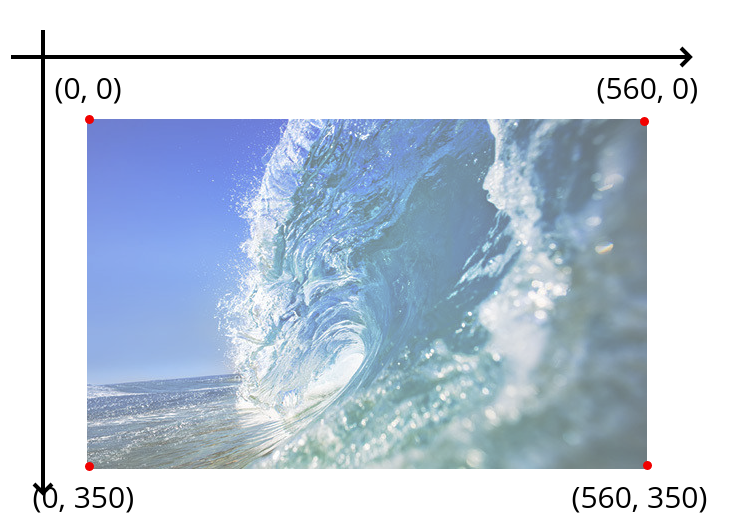

Координаты нужно передать в таком порядке: слева, сверху, справа, снизу. Например, вы хотите отрезать 10 пикселей слева и 15 сверху:

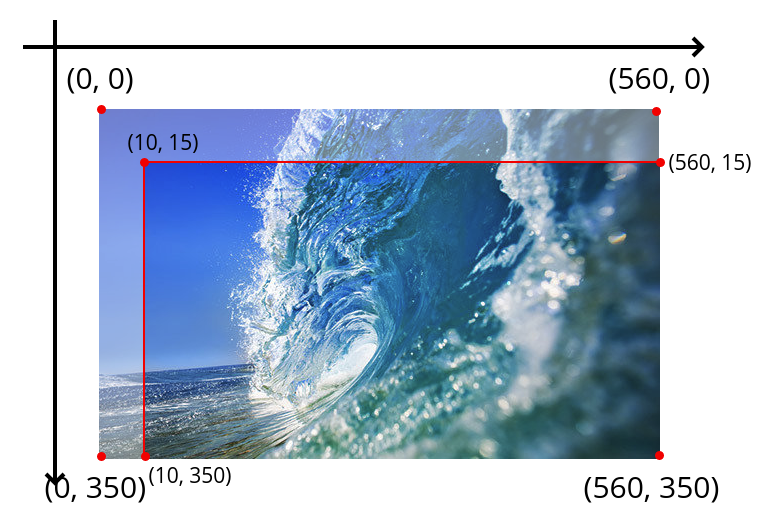

Пример:


In [ ]:
from PIL import Image

image = Image.open("example.jpg")
coordinates = (10, 15, image.width, image.height)
cropped = image.crop(coordinates)

Этот код отрезает 10 пикселей слева и 15 сверху. Самая правая координата — это и есть ширина картинки, а самая нижняя — высота, поэтому мы и использовали эти атрибуты картинки.

**6.Разделить картинку на каналы**

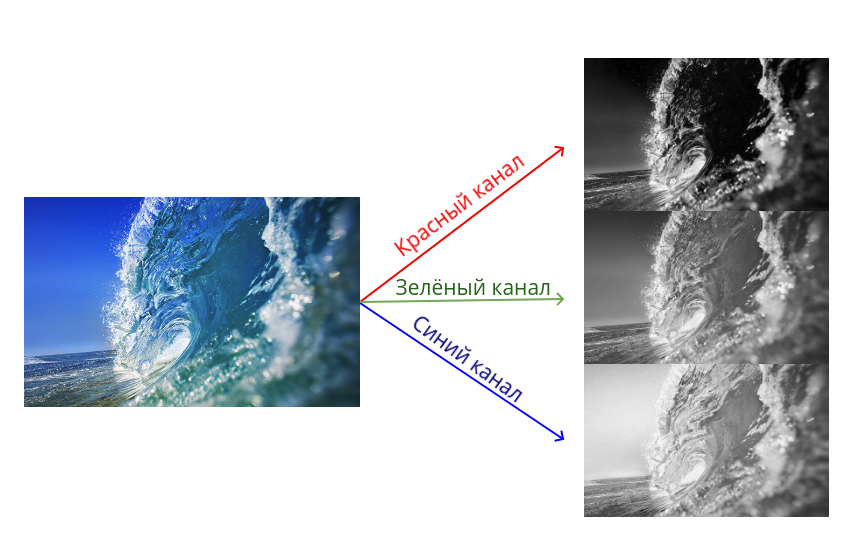

Картинки состоят из пикселей разных цветов. Каждый пиксель картинки в RGB состоит из 3 значений: сколько в нём красного, сколько зелёного и сколько синего. А в цветовой схеме CMYK из четырёх: голубой, пурпурный, жёлтый и чёрный. Все значения от 0 до 255. 0 — нет такого цвета, а 255 — его очень-очень много.

На самом деле картинки хранят не по пикселям, а по каналам. RGB картинка хранится как 3 картинки: в первой в каждом пикселе число от 0 до 255, показывающее, сколько в нём красного. Во второй то же, только с зелёным, а в третьем — с синим.

Получается 3 картинки. Но если взять какой-то цветовой канал отдельно от картинки, то она не будет знать, какой цвет ей показывать. У неё в каждом пикселе всего одно значение от 0 до 255. Поэтому она отображается как чёрно-белая. Если в пикселе хранится 0, то пиксель будет чёрный, а если 255 — белый. Чем больше число, тем светлее пиксель.

Метод **.split()** разбивает картинку на каналы. Работает так:



In [ ]:
from PIL import Image

image = Image.open("example.jpg")
print(image.mode)  # Вернуло CMYK, значит канала 4
cyan, magenta, yellow, key_color = image.split()  # В переменные запишутся 4 чёрно-белые картинки.

**7. Собрать картинку из каналов**

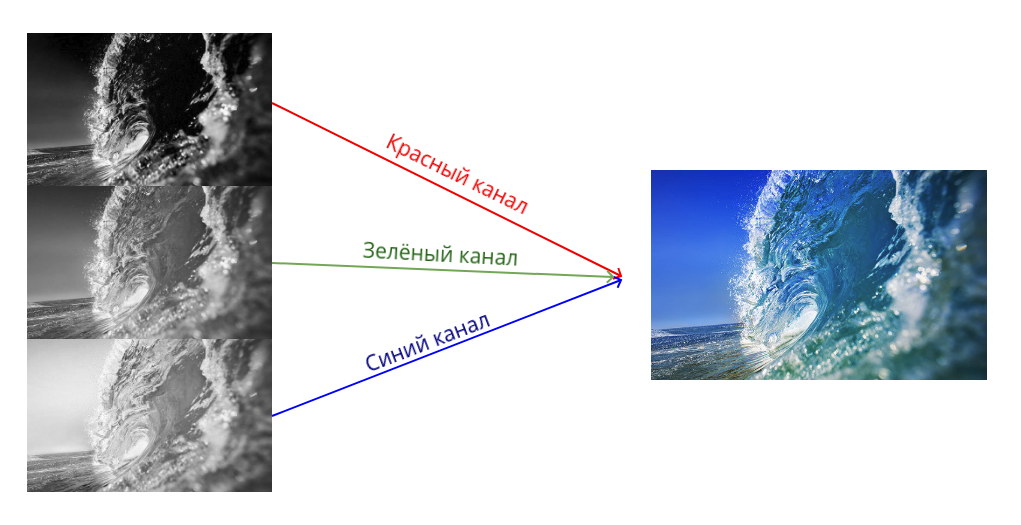

Pillow позволяет разделять картинку на каналы. Но так же позволяет и собирать её обратно. За это отвечает функция **Image.merge()**. Она принимает на вход 2 аргумента:

Цветовая модель будущей картинки и
кортеж из цветовых каналов. Если модель RGB, то первый канал будет покрашен в красный, второй в зелёный, третий в синий.

Пример:

In [ ]:
from PIL import Image

image = Image.open("example.jpg")
print(image.mode)  # Вернуло CMYK, значит канала 4
cyan, magenta, yellow, key_color = image.split()  # В переменные запишутся 4 чёрно-белые картинки.
new_image = Image.merge("CMYK", (cyan, magenta, yellow, key_color))

new_image ничем не отличается от image, т.к. состоит из тех же каналов в том же порядке.

**8. Покрасить цветовой канал**

Pillow позволяет раскрашивать чёрно-белые картинки. За это отвечает функция **ImageOps.colorize()**.

Она принимает 3 аргумента: Картинка, какой цвет показывать вместо чёрного и какой вместо белого.

Пример:



In [ ]:
from PIL import Image, ImageOps

image = Image.open("example.jpg")
colorized = ImageOps.colorize(image, black ="red", white ="yellow")

Код сделает из этой картинки:

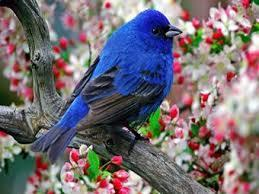

Вот такую:

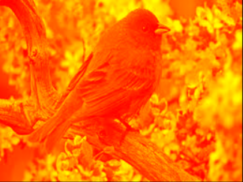

Мне, честно говоря, на этом моменте стало страшно:)))

**9. Изменить размер картинки**

> Как работает thumbnail

 - Метод **resize** приводит картинку к желаемому размеру без сохранения пропорций. Картинка жмётся, становится некрасивой.
 - Метод **thumbnail** сохраняет пропорции.

**Подробнее о thumbnail**

С помощью метода **.thumbnail()** можно легко сделать миниатюру изображения. Миниатюра — уменьшенная версия картинки, с сохранением пропорций. На вход принимается кортеж с максимальными шириной и высотой. Метод **.thumbnail()** сам подберёт новые координаты так, чтобы картинка поместилась в заданную область. Например, у вас есть картинка 800x1200 и вы хотите поместить её в рамку 1200x600, то результат метода будет 400x600, т.к. 400x600 как раз помещается в 1200x600:



In [ ]:
from PIL import Image

image = Image.open("example.jpg")
print(image.size)  # Вывелось (800, 1200)
image.thumbnail((1200, 600))  # Картинка теперь размера 400 на 600
print(image.size)  # Вывелось (400, 600)

**10. Наложить картинки друг на друга**

Функция **Image.blend()** создаёт новую картинку, накладывая одно изображение поверх другого. Для работы ему необходимы три аргумента:

Первая картинка.
Вторая картинка, того же размера, что и первая.
Коэффициент прозрачности.

Если прозрачность равна 0.5, то картинки смешаются в равных долях. Если коэффициент равен 1.0, то первая картинка станет полностью прозрачной и останется только вторая. Если 0.0, то наоборот. Прозрачность задаётся дробным числом через точку.

In [ ]:
from PIL import Image

image1 = Image.open("image1.jpg")
image2 = Image.open("image2.jpg")
image3 = Image.blend(image1, image2, 0.5)  # Получится картинка, сложенная из двух

**11. Наложить со смещением**

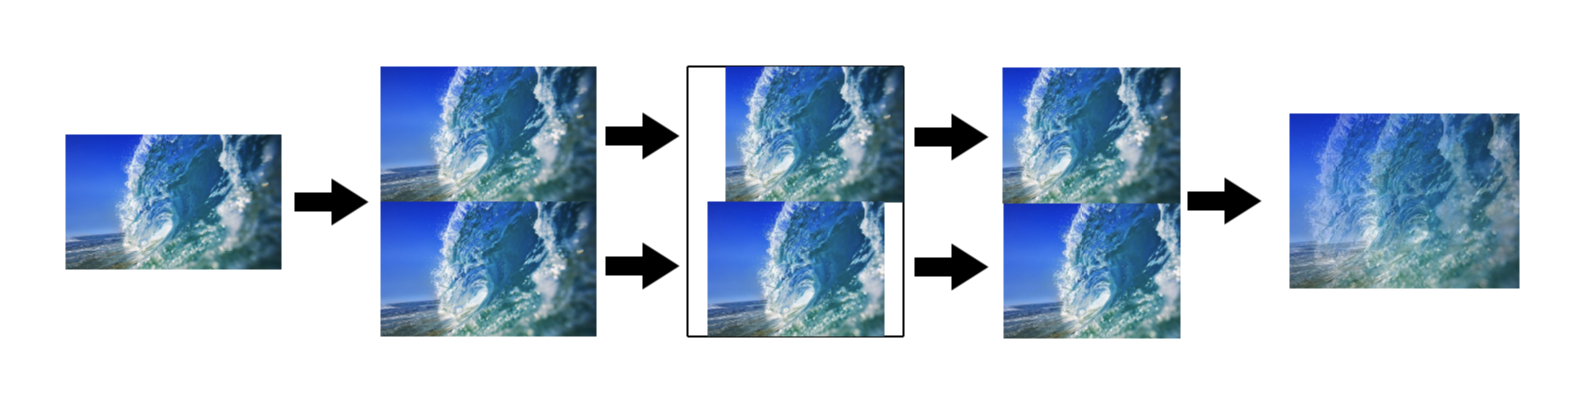

Отдельного метода для этого нет, но получается за счёт комбинации **.crop() и Image.blend()**.

 - Выберите картинку для эффекта. У меня это картинка wave.png с шириной в 1000 пикселей.
 - Отрежьте от неё 200 пикселей слева. Получится wave_left.png шириной 800 пикселей.
 - Возьмите исходную картинку wave.png и отрежьте от неё по 100 пикселей с обоих сторон: слева и справа. Получится wave_middle.png тоже шириной в 800 пикселей.
 - Наложите wave_left.png на wave_middle.png с помощью Image.blend()
 - Сохраните в файл то, что получилось. Это картинка смещённая влево.